# Final CNN

## 모듈 정의 

In [3]:
#에러 코드 핸들링
import os
import warnings

import datetime
import numpy as np
import matplotlib.pyplot as plt

# 이미지 -> 디렉토리 및 라벨링
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils import to_categorical

#모델링
from keras.models import Sequential,load_model
from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
warnings.filterwarnings(action='ignore')

# 이미지데이터
1) 이미지 데이터를 Keras 의 ImageDataGenerator함수 이용해서   
   Keras내의 directory에 저장합니다.  
      
2) 이때 train 데이터는 증폭하여 저장했습니다.  
  
3) 그리고 실제 train 데이터를 저장하였고   
4) validation 데이터와 4:1 비율로 나누었습니다.   
5) 이때 subset으로  Train data, Validation data로 표기도 했습니다.   
6) 그리고 test 데이터도 같은 방법으로 사용했습니다.  
  
--- 
[참고]  
- 시행착오 : 데이터사이언스개론_딥러닝_이미지분류    
  -> 이미지데이터 -> numpy로 하나하나 다 불러와서   
     data split도 직접 하고  
     음식, 실내, 실외 데이터 합치다가   
     메모리 초과..  


In [4]:
# 데이터 증폭
'''
validation_split = 0.2,  => train : validation 8:2 
rotation_range=10,      =>회전 각도 10도까지
zoom_range = 0.3,       => 확대 범위
width_shift_range=0.2,  => 좌우 이동 범위
height_shift_range=0.2) => 상하 이동 범위
'''
train_data_augmentation = ImageDataGenerator(
    validation_split = 0.2,
    rotation_range=10,
    zoom_range = 0.3,
    width_shift_range=0.2,
    height_shift_range=0.2)

#train 데이터 설정 
train_data = train_data_augmentation.flow_from_directory(
        './images2/train',
        target_size = (300,300),
        batch_size=150,
        classes = ['food','interior', 'exterior'],
        shuffle =True,
        class_mode='categorical')


# validation 데이터 설정
validation_data = train_data_augmentation.flow_from_directory(
        './images2/train',
        target_size = (300,300),
        batch_size=400,
        classes = ['food','interior', 'exterior'],
        shuffle =True,
        class_mode='categorical',
        subset='validation')

#test 데이터 설정
test_data = ImageDataGenerator().flow_from_directory(
        './images2/test',
        classes = ['food','interior', 'exterior'],
        target_size=(300,300),
        batch_size=100,
        shuffle =True,
        class_mode='categorical')

Found 36000 images belonging to 3 classes.
Found 7200 images belonging to 3 classes.
Found 9000 images belonging to 3 classes.


# Model Layers

- 가장 어려운 문제였습니다.

In [5]:
model = Sequential([

Input(shape=(300,300,3), name='input_layer'),
experimental.preprocessing.Rescaling(1./255),
    
Conv2D(32,(3,3), activation='relu',name='Conv_layer1'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer2'),   

Conv2D(96,(3,3), activation='relu',name='Conv_layer3'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer4'),

Conv2D(64,(3,3), activation='relu',name='Conv_layer5'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer6'), 

Dropout(0.5),
Conv2D(128,(3,3), activation='relu',name='Conv_layer7'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer8'),

Flatten(),
Dense(160, activation='relu',name='FC_layer9', kernel_initializer='glorot_uniform',),
Dense(20, activation='relu',name='FC_layer10', kernel_initializer='glorot_uniform',),
Dense(3, activation='softmax', name='output_layer11')
])

NameError: name 'experimental' is not defined


# 3. 모델 학습과정 설정 및 요약

In [10]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
Conv_layer1 (Conv2D)         (None, 298, 298, 32)      896       
_________________________________________________________________
Pooling_layer2 (MaxPooling2D (None, 149, 149, 32)      0         
_________________________________________________________________
Conv_layer3 (Conv2D)         (None, 147, 147, 96)      27744     
_________________________________________________________________
Pooling_layer4 (MaxPooling2D (None, 73, 73, 96)        0         
_________________________________________________________________
Conv_layer5 (Conv2D)         (None, 71, 71, 64)        55360     
_________________________________________________________________
Pooling_layer6 (MaxPooling2D (None, 35, 35, 64)       

# Model Fitting

In [12]:

a = datetime.datetime.now()
print('fitting start', a)

# 4. 모델 학습
def model_():
    history = model.fit(

        train_data,

        steps_per_epoch=15,

        epochs=30,

        validation_data=validation_data,

        validation_steps=10)

    model.save('model-201814132')
    return history


model.save('model-201814132')
b = datetime.datetime.now()
history = model_()
print('Fitting End', b)
print('Fitting Time =' , b-a)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
Conv_layer1 (Conv2D)         (None, 298, 298, 32)      896       
_________________________________________________________________
Pooling_layer2 (MaxPooling2D (None, 149, 149, 32)      0         
_________________________________________________________________
Conv_layer3 (Conv2D)         (None, 147, 147, 96)      27744     
_________________________________________________________________
Pooling_layer4 (MaxPooling2D (None, 73, 73, 96)        0         
_________________________________________________________________
Conv_layer5 (Conv2D)         (None, 71, 71, 64)        55360     
_________________________________________________________________
Pooling_layer6 (MaxPooling2D (None, 35, 35, 64)       

In [ ]:
a = datetime.datetime.now()
print('fitting start',a)

def model_():
    history = model.fit(
                        train_data,
                        steps_per_epoch = 10,
                        epochs= 15,
                        validation_data=validation_data,
                        validation_steps=10)
    
    model.save('model-201814132')
    return history

b = datetime.datetime.now()
print('Fitting End',b)
print('Fitting Time = ' , b-a)

## 그래프 함수  
1) loss 그래프 함수  
2) accuracy 그래프 함수  

In [154]:
def plot_loss_curve(history):
    plt.figure(figsize = (5,3))
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    
    plt.legend(['train','test'], loc = 'upper right')
    plt.show

    
def plot_accuracy_curve(history):
    plt.figure(figsize = (5,3))
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])

    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    
    plt.legend(['train','test'], loc = 'upper right')
    plt.show

In [156]:
plot_accuracy_curve(history.history)

print('train accuracy ={} , validation accuracy ={}' .format(
                                                            round(history.history['accuracy'][-1],5), 
                                                            round(history.history['val_accuracy'][-1],5) ))
plot_loss_curve(history.history)
print('train loss ={} ,     validation loss ={}' .format(
                                                        round(history.history['loss'][-1],5), 
                                                        round(history.history['val_loss'][-1],5) ))

NameError: name 'history' is not defined

# 모델 평가


In [10]:


print("-- Evaluate --")

scores = model.evaluate_generator(test_data, steps=5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

 

# 6. 모델 사용하기

print("-- Predict --")

output = model.predict_generator(test_data, steps=5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(test_data.class_indices)

print(output)

 

 

-- Evaluate --
accuracy: 43.20%
-- Predict --
{'food': 0, 'interior': 1, 'exterior': 2}
[[0.440 0.306 0.254]
 [0.500 0.291 0.209]
 [0.339 0.328 0.332]
 [0.362 0.330 0.309]
 [0.331 0.334 0.335]
 [0.394 0.320 0.285]
 [0.531 0.280 0.189]
 [0.455 0.299 0.246]
 [0.690 0.211 0.099]
 [0.500 0.294 0.205]
 [0.502 0.291 0.207]
 [0.451 0.307 0.242]
 [0.506 0.290 0.204]
 [0.362 0.331 0.306]
 [0.333 0.332 0.335]
 [0.380 0.321 0.300]
 [0.339 0.332 0.329]
 [0.513 0.289 0.198]
 [0.340 0.330 0.330]
 [0.437 0.306 0.257]
 [0.334 0.334 0.332]
 [0.361 0.329 0.311]
 [0.431 0.310 0.259]
 [0.359 0.328 0.313]
 [0.412 0.317 0.271]
 [0.373 0.321 0.305]
 [0.342 0.330 0.327]
 [0.333 0.331 0.335]
 [0.359 0.331 0.310]
 [0.493 0.297 0.211]
 [0.355 0.331 0.314]
 [0.633 0.240 0.127]
 [0.372 0.325 0.303]
 [0.528 0.282 0.190]
 [0.344 0.329 0.327]
 [0.333 0.334 0.334]
 [0.462 0.301 0.237]
 [0.345 0.331 0.324]
 [0.340 0.333 0.327]
 [0.461 0.303 0.236]
 [0.485 0.296 0.219]
 [0.473 0.297 0.230]
 [0.334 0.330 0.336]
 [0.582 0

In [ ]:
## 그래프


def plot_loss_curve(history):

    plt.figure(figsize = (5,3))

    plt.plot(history['loss'])

    plt.plot(history['val_loss'])


    plt.title('model loss')

    plt.xlabel('epoch')

    plt.ylabel('loss')

    plt.legend(['train','test'], loc = 'upper right')

    plt.show

    
def plot_accuracy_curve(history):

    plt.figure(figsize = (5,3))

    plt.plot(history['accuracy'])

    plt.plot(history['val_accuracy'])


    plt.title('model accuracy')

    plt.xlabel('epoch')

    plt.ylabel('accuracy')

    plt.legend(['train','test'], loc = 'upper right')

    plt.show

plot_accuracy_curve(history.history)

print('train accuracy ={} , validation accuracy ={}' .format(
                                                            round(history.history['accuracy'][-1],5), 
                                                            round(history.history['val_accuracy'][-1],5) ))
plot_loss_curve(history.history)
print('train loss ={} ,     validation loss ={}' .format(
                                                        round(history.history['loss'][-1],5), 
                                                        round(history.history['val_loss'][-1],5) ))

model = load_model('Model_Go_X4')
# 5. 모델 평가하기

print("-- Evaluate --")

scores = model.evaluate_generator(test_data, steps=5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

 

# 6. 모델 사용하기

print("-- Predict --")

output = model.predict_generator(test_data, steps=5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(test_data.class_indices)

print(output)

 

 

In [ ]:
def plot_loss_curve(history):
    plt.figure(figsize = (5,3))
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper right')
    plt.show

# test image(data) numpy array
1) 데이터 처리에 가장 문제가 많았습니다.   
2) 왜냐하면 numpy array로 변환하기위해서 많은 노력을했습니다.   
   한번에 많이 올리면 메모리 초과로 고배를 마시고    
   나눠서 올려서 합치려고 했었는데 이마저도 결국 메모리 부족으로 불가했습니다.   
3) 그렇게 이미지제네레이터를 알게되었고   
   이는 폴더내에서 이미지를 나누어놓고 클래스를 지정해놓으면 그대로 라벨링하며 딕셔너리로 만들어 주는 함수를 찾았습니다.  
4) 그 폴더를 가지고 훈련은 시켰으나  
   (훈련에도 굉장히 많은 시간이.. ㅠㅠ)  
5) 출력에 와서 굉장히 큰 문제가 발생했습니다.  
6) 바로... 어떻게 꺼내와야하는지도 몰랐고, 라벨링이 어떻게 되어있는지도 몰랐습니다.  
7) 그렇게   
   x=np.concatenate([test_data.next()[0] for i in range(test_data.__len__())])    
   y=np.concatenate([test_data.next()[1] for i in range(test_data.__len__())])  
   numpy의 concatenate를 적용했지만    
   예측함수를 통해 예측하는중에 라벨링이 이상한걸보고   
   하나하나 사진을 출력해보며 이미지 데이터와 확인해보니 라벨링이 엉망으로 되어있었씁니다.  
   이는 넘파이에서 행과 열에서 하나씩 붙여오다보니 오류가 난거라고 생각하였고  
   큰 고민에 빠졌습니다.    
     
 8) 그렇게 next 함수를 발견하였고 너무나 쉽게 딕셔너리가 numpy array로 변해 들어감을 확인했고  
    실제값에 정확하게 라벨링이되어있는걸 확인할 수 있었씁니다.  

In [7]:
X,y = test_data.next()

# 클래스 출력

### 클래스 출력을 숫자로 하니 자꾸 헷갈려서 한글로 출력하도록 함수 만들었습니다.

In [12]:
def print_class(Num):
    class_of_Image = '음식' if Num == 0 else '실내' if Num==1 else '실외'
    return class_of_Image


# 예측 함수
   1) NoPrint : 각 예측값들 확인 안하고 총 정확도만 보기 위해  
   2) Print 모든 과정 예측값 확인

In [13]:
def predict_image_sample_Noprint(model,X_test, y_test,test_id= -1 ):

    if test_id <0 :
        from random import randrange
        test_sample_id = randrange(len(y))
    else:
        test_sample_id = test_id
        
    test_image =X_test[test_sample_id]

    test_image = test_image.reshape(1,300,300,3)
    

    y_actual = y_test[test_sample_id]

    y_actual_num = np.argmax(y_actual)
    actual_class = print_class(y_actual_num)


    y_pred = model.predict(test_image)
    
    y_pred_num = np.argmax(y_pred, axis = 1)[0]
    predict_class = print_class(y_pred_num)

    if y_pred_num != y_actual_num:
        with open("wrong_samples.txt", "a") as errfile:
            print('%d'%test_sample_id, file = errfile)
    else:
        pass
    
    return y_actual_num, y_pred_num
#model = load_model('Model_Go_X3')
#predict_image_sample_Noprint(model,X, y)

In [16]:
def predict_image_sample_Print(model,X_test, y_test,test_id= -1 ):

    if test_id <0 :
        from random import randrange
        test_sample_id = randrange(len(y))

    else:
        test_sample_id = test_id

    test_image =X_test[test_sample_id]


    #이미지로 만들기
    pixels = np.array(test_image,np.int32)
    plt.imshow(pixels)
    
    test_image = test_image.reshape(1,300,300,3)
    
   
    y_actual = y_test[test_sample_id]
    #print( y_actual)
    y_actual_num = np.argmax(y_actual)
    actual_class = print_class(y_actual_num)
    
    
    y_pred = model.predict(test_image)
    
   
    y_pred_num = np.argmax(y_pred, axis = 1)[0]
    predict_class = print_class(y_pred_num)

    #print('실제 클래스 = ', actual_class)
    #print('예측 클래스 = ', predict_class)
    
    
    print('Actual= {}({}) , Predict= {}({})'.format(actual_class,y_actual_num ,predict_class,y_pred_num))
    print("\ny_pred = ", y_pred)
    print('-'*15)
    
    if y_pred_num != y_actual_num:
        with open("틀린 이미지들.txt", "a") as errfile:
            print("%d"%test_sample_id, file=errfile)
    else:
        pass

    
    return y_actual_num, y_pred_num

'''
print(test_data.class_indices,'\n')
model = load_model(' ')
predict_image_sample_Print(model,X, y)
'''

"\nprint(test_data.class_indices,'\n')\nmodel = load_model(' ')\npredict_image_sample_Print(model,X, y)\n"

# Model 통해 예측 

1) test_data를 경로를 input하여 지정해주세요.  
2) load_model을 통해 지정한 모델을 불러옵니다.   
3) 

./images2/test
Found 9000 images belonging to 3 classes.
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.8424591  0.14436617 0.01317466]]
---------------
Actual= 음식(0) , Predict= 실내(1)

y_pred =  [[0.3465185  0.44842675 0.20505477]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.02808022 0.36117256 0.6107473 ]]
---------------
Actual= 실내(1) , Predict= 실내(1)

y_pred =  [[0.19012032 0.71109164 0.09878806]]
---------------
Actual= 음식(0) , Predict= 실내(1)

y_pred =  [[0.35556522 0.5173687  0.1270662 ]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.4732948  0.27244574 0.25425947]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.8515526  0.11149149 0.03695589]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.0162299 0.2335395 0.7502306]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.7080272  0.23182523 0.06014756]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.01852252 0.3340579  0.6474196 ]]
------------

Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.7790777  0.18750277 0.03341955]]
---------------
Actual= 실내(1) , Predict= 실외(2)

y_pred =  [[0.01231362 0.40367356 0.5840128 ]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.04414139 0.32669622 0.62916243]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.01400372 0.06307182 0.92292446]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.01363577 0.13972399 0.8466402 ]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.7297526  0.2404571  0.02979031]]
---------------
Actual= 실내(1) , Predict= 실외(2)

y_pred =  [[0.04950996 0.46241572 0.48807436]]
---------------
Actual= 음식(0) , Predict= 실내(1)

y_pred =  [[0.15351392 0.6016448  0.24484128]]
---------------
Actual= 실내(1) , Predict= 실내(1)

y_pred =  [[0.00809297 0.8001164  0.1917905 ]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.01255948 0.15224203 0.83519846]]
---------------
Actual= 실내(1) , Predict= 실외(2)

y_pred =  [[0.0136

Actual= 실내(1) , Predict= 실외(2)

y_pred =  [[0.00332896 0.130034   0.86663705]]
---------------
Actual= 음식(0) , Predict= 실내(1)

y_pred =  [[0.23345238 0.6265262  0.14002141]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.5830437  0.31757393 0.09938232]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.02689986 0.11438891 0.8587113 ]]
---------------
Actual= 음식(0) , Predict= 실외(2)

y_pred =  [[0.18519944 0.3848646  0.42993596]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.00682904 0.22458887 0.7685821 ]]
---------------
Actual= 실내(1) , Predict= 실내(1)

y_pred =  [[0.07096999 0.75371    0.17532004]]
---------------
Actual= 음식(0) , Predict= 실내(1)

y_pred =  [[0.09703626 0.5620644  0.3408993 ]]
---------------
Actual= 실내(1) , Predict= 실내(1)

y_pred =  [[0.01762037 0.68734837 0.29503128]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.8201035  0.13972026 0.04017619]]
---------------
Actual= 실내(1) , Predict= 실내(1)

y_pred =  [[0.0245

Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.02215233 0.392957   0.5848907 ]]
---------------
Actual= 실내(1) , Predict= 실내(1)

y_pred =  [[0.01762037 0.68734837 0.29503128]]
---------------
Actual= 실외(2) , Predict= 실내(1)

y_pred =  [[0.07104001 0.48111403 0.447846  ]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.6039027  0.3233173  0.07278004]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.01000154 0.16030137 0.8296971 ]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.8510457  0.11340485 0.03554936]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.6767627  0.2669582  0.05627909]]
---------------
Actual= 실내(1) , Predict= 실내(1)

y_pred =  [[0.0350511 0.5552301 0.4097188]]
---------------
Actual= 음식(0) , Predict= 실내(1)

y_pred =  [[0.07477559 0.7750763  0.1501481 ]]
---------------
Actual= 실내(1) , Predict= 실외(2)

y_pred =  [[0.01080329 0.43161514 0.55758154]]
---------------
Actual= 음식(0) , Predict= 실내(1)

y_pred =  [[0.3069634

Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.01389757 0.3729906  0.6131118 ]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.8006299  0.16682565 0.03254434]]
---------------
Actual= 음식(0) , Predict= 실내(1)

y_pred =  [[0.04983442 0.4817599  0.46840563]]
---------------
Actual= 음식(0) , Predict= 실외(2)

y_pred =  [[0.02596088 0.3127452  0.6612939 ]]
---------------
Actual= 실내(1) , Predict= 실내(1)

y_pred =  [[0.0248168  0.9016658  0.07351746]]
---------------
Actual= 음식(0) , Predict= 실외(2)

y_pred =  [[0.02130635 0.41275135 0.56594235]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.8968051  0.08469319 0.01850172]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.00928626 0.22247766 0.7682361 ]]
---------------
Actual= 음식(0) , Predict= 음식(0)

y_pred =  [[0.71030134 0.22329989 0.06639872]]
---------------
Actual= 실외(2) , Predict= 실외(2)

y_pred =  [[0.00616529 0.10913333 0.8847013 ]]
---------------
Actual= 실내(1) , Predict= 실내(1)

y_pred =  [[0.0125

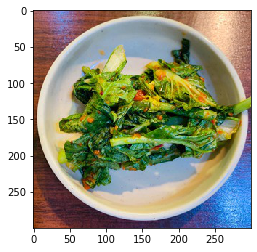

In [17]:
#test 데이터 설정
#path = '  ./images2/test  '
path = input()
test_data = ImageDataGenerator().flow_from_directory(
        path,
        classes = ['food','interior', 'exterior'],
        target_size=(300,300),
        batch_size=400,
        shuffle =True,
        class_mode='categorical')


if __name__ == '__main__' :
    X_test , y_test = test_data.next()
    model = load_model('model-201814132')
    
    corr,count = 0,0
    y_true_mat, y_pred_mat = [] , []
    
    for i in range(len(y)):
        count +=1
        y_act, y_pre = predict_image_sample_Print(model,X_test, y_test)
        y_true_mat.append(y_act)
        y_pred_mat.append(y_pre) 
        if y_act == y_pre :
            corr +=1 
        else:
            continue
    
    print('총횟수 = {} , 맞춘횟수={} , 정확도(Accuracy)={} '.format(count,corr, (corr/count)*100 ) )


### Precision ,Recall,F1-score

In [152]:
from sklearn.metrics import precision_recall_fscore_support as score
import pandas as pd
precision, recall, fscore, support = score(y_true_mat, y_pred_mat)

Confusion_Matrix = pd.DataFrame(np.array([precision, recall, fscore]),
                               columns = ['음식','실내','실외'] ,
                               index  = ["Precision", "Recall", "F1-score"])
print(Confusion_Matrix)

                 음식        실내        실외
Precision  0.892857  0.533333  0.444444
Recall     0.510204  0.727273  0.666667
F1-score   0.649351  0.615385  0.533333


# 이미지 검증

In [12]:
a = datetime.datetime.now()
print('fitting start', a)

# 4. 모델 학습
def model_():
    history = model.fit(

        train_data,

        steps_per_epoch=15,

        epochs=30,

        validation_data=validation_data,

        validation_steps=10)

    model.save('model-201814132')
    return history


model.save('model-201814132')
b = datetime.datetime.now()
#history = model_()
print('Fitting End', b)
print('Fitting Time =' , b-a)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
Conv_layer1 (Conv2D)         (None, 298, 298, 32)      896       
_________________________________________________________________
Pooling_layer2 (MaxPooling2D (None, 149, 149, 32)      0         
_________________________________________________________________
Conv_layer3 (Conv2D)         (None, 147, 147, 96)      27744     
_________________________________________________________________
Pooling_layer4 (MaxPooling2D (None, 73, 73, 96)        0         
_________________________________________________________________
Conv_layer5 (Conv2D)         (None, 71, 71, 64)        55360     
_________________________________________________________________
Pooling_layer6 (MaxPooling2D (None, 35, 35, 64)       

394
Actual= 음식(0) , Predict= 실외(2)

y_pred =  [[0.05314759 0.43804973 0.50880265]]


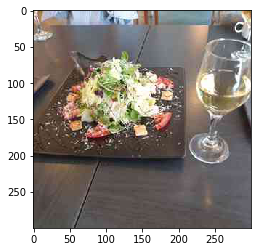

In [24]:
image_num = int(input())
test_image =X_test[image_num]

pixels = np.array(test_image,np.int32)
plt.imshow(pixels)

test_image = test_image.reshape(1,300,300,3)


y_actual = y_test[image_num]

y_actual_num = np.argmax(y_actual)
actual_class = print_class(y_actual_num)


y_pred = model.predict(test_image)


y_pred_num = np.argmax(y_pred, axis = 1)[0]
predict_class = print_class(y_pred_num)


    
print('Actual= {}({}) , Predict= {}({})'.format(actual_class,y_actual_num ,predict_class,y_pred_num))
print("\ny_pred = ", y_pred)
